# Valor crítico del test de una vacuna

Calcula el número máximo de contagios en el grupo tratamiento para que la eficacia de una vacuna sea aceptada

In [1]:
%matplotlib notebook

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import pandas as pd

Eficacia hipótesis nula

In [3]:
eficacia0 = 0.3

Significancia

In [4]:
alpha = 0.025

Número de contagios en el punto de análisis

Puntos de análisis (protocolo): 32, 62, 92, 120, 164. Análisis final n = 170

In [5]:
n = 170

Probabilidad que un caso esté en el grupo de tratamiento (*se asume una proporción 1:1 entre el tamaño de los grupos de tratamiento y control*)

In [6]:
p = (1-eficacia0)/(2-eficacia0)
p

0.4117647058823529

## Distribución del número de casos en el grupo de tratamiento

In [7]:
rv = binom(n, p)

<IPython.core.display.Javascript object>


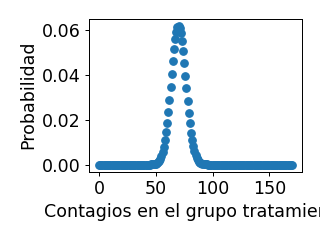

In [8]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Contagios en el grupo tratamiento')
ax1.set_ylabel('Probabilidad')
k = range(n+1)
proba1 = rv.pmf(k)
ax1.plot(k, proba1, ls='', marker='o', label='Proba')

##  Probabilidad acumulada

<IPython.core.display.Javascript object>


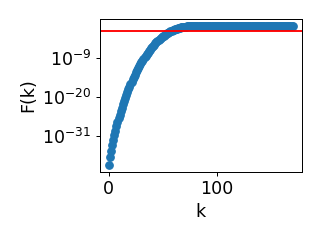

In [9]:
fig2, ax2 = plt.subplots()
ax2.set_xlabel('k')
ax2.set_ylabel('F(k)')
ax2.set_yscale('log')
proba2 = rv.cdf(k)
ax2.plot(k, proba2, ls='', marker='o', label='F(k)')
ax2.axhline(y=alpha, color='r', linestyle='-')

## Valor crítico

Como k es discreto k_c es el máximo k tal que F(k) ≤ α 

In [10]:
proba2>alpha

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [11]:
valor_critico = np.argmax(proba2>alpha)-1
valor_critico

57

In [12]:
tabla = pd.DataFrame({'k': k, 'F(k)': proba2})
tabla.iloc[valor_critico-2:valor_critico+3,:]

,k,F(k)
55,55,0.011186
56,56,0.016844
57,57,0.024765
58,58,0.035567
59,59,0.049921
